In [29]:
# ECE471/571 Project 4
# Ken Boling
# Python 3.6.2
# Pycharm Development Environment

# resets all variables within the Jupyter notebook 
%reset -f


import pandas as pd
import os
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import neighbors, tree
from sklearn.neural_network import MLPClassifier
import graphviz

from matplotlib import pyplot as plt
import seaborn as sns




In [30]:

####
def Kens_kNNnew(trX, X, k, column_name):
    start = time.time()

    kNNlist = []

    def rowply(row):
        Xrow = pd.DataFrame(row.iloc[:9])
        #print(Xrow)
        trXnum = pd.DataFrame(trX.iloc[:, :9])

        # *** MAKE SURE TO ALIGN DATAFRAMES SO THEY BROADCAST PROPERLY!!!!! such as: Xrow.T ****
        # 2 hours or more to figure that out!!

        Xdist = pd.DataFrame(np.sqrt(np.sum(np.power(np.subtract(trXnum, Xrow.T), 2), axis=1)))
        Xdist.rename(columns={0: 'dist'}, inplace=True)
        trdataX = pd.concat([Xdist, trX[column_name]], axis=1)
        test1 = trdataX.nsmallest(n=k, columns='dist', keep='first')

        test2 = test1.groupby([column_name]).size().reset_index()

        test2.rename(columns={0: 'count'}, inplace=True)

        test3 = test2.nlargest(n=1, columns='count', keep='first')

        kNNlist.append(test3[column_name].values)

        return

    X.apply(rowply, axis=1)

    kNNclasslistapp = pd.DataFrame(np.concatenate(kNNlist),index=X.index)
    kNNclasslistapp.rename(columns={0: 'kNN_class'}, inplace=True)
    Xout = pd.concat([X, kNNclasslistapp], axis=1)
    end = time.time()
    #print('kNN time to complete:', end - start, 'seconds')
    return Xout

####

####
def errorchk(df, truecol, testcol):
    start = time.time()  # timer

    # discriminator
    conditions = (truecol == testcol, truecol != testcol)
    choices = ('correct', 'error')
    df['error_check'] = np.select(conditions, choices)

    # the pandas groupby function was used to get the total counts of the errors for each class
    rate = df.groupby('error_check', as_index=False).size()
    accuracy = (rate['correct']) / (rate['correct'] + rate['error'])
    #print('total accuracy:', accuracy)

    end = time.time()

    #print('time to complete:', end - start, 'seconds')

    return accuracy
####


   type   0
0     1  70
1     2  76
2     3  17
3     5  13
4     6   9
5     7  29
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
['RI' 'Na' 'Mg' 'Al' 'Si' 'K' 'Ca' 'Ba' 'Fe']


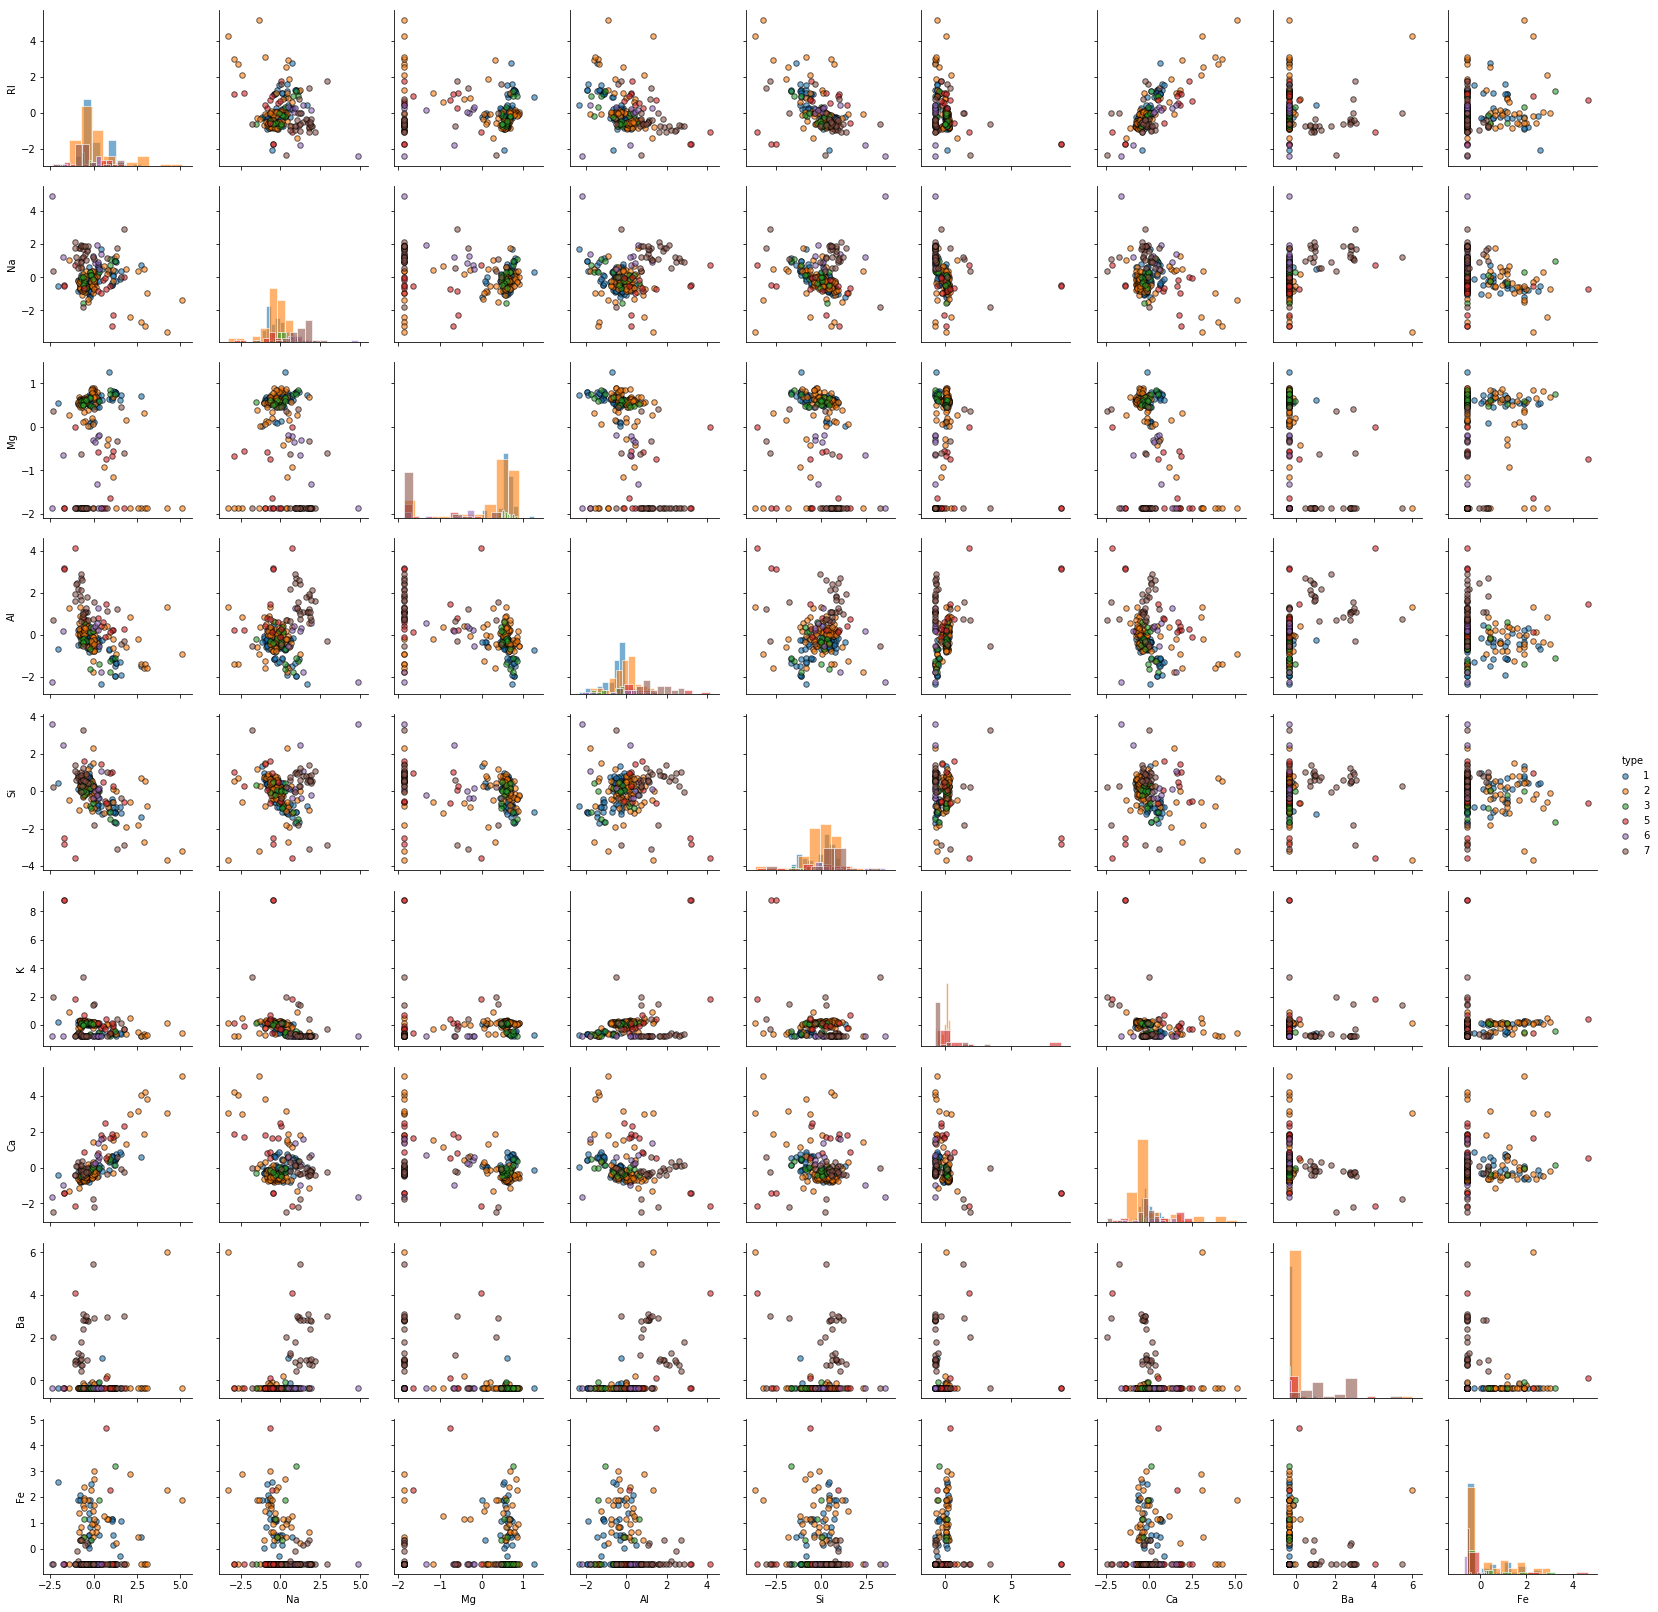

iteration 1
iteration 2
iteration 3
iteration 4


C:\Program Files\Python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iteration 5


C:\Program Files\Python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iteration 6
iteration 7


C:\Program Files\Python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Program Files\Python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Program Files\Python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iteration 8
iteration 9


C:\Program Files\Python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Program Files\Python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iteration 10


C:\Program Files\Python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Program Files\Python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iteration 11


C:\Program Files\Python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Program Files\Python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iteration 12


C:\Program Files\Python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iteration 13
iteration 14


C:\Program Files\Python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
    MLP_score  acc_kens_kNN  acc_mean_MLP  acc_mean_sk_kNN  acc_mean_tree  \
0    0.508775      0.696262      0.532808         0.692254       0.653756   
1    0.629079      0.710280      0.619690         0.701290       0.689685   
2    0.665304      0.710280      0.577283         0.692328       0.700705   
3    0.717664      0.654206      0.645333         0.644818       0.712267   
4    0.781035      0.626168      0.667941         0.613929       0.719990   
5    0.797863      0.644860      0.629350         0.635437       0.685653   
6    0.835424      0.635514      0.702926         0.629079       0.675903   
7    0.856720      0.654206      0.621472         0.650865       0.672533   
8    0.885022      0.635514      0.688841         0.625465       0.655338   
9    0.888929      0.635514      0.685371         0.632522       0.653671   
10   0.899652      0.630841      0.656565         0.624112       0.655894  

In [31]:


working_directory = 'C:\\Users\\Ken\\Google Drive\\UTK Class work\\Pattern Classification\\Project 4'

# load data
fglass = pd.read_csv((os.path.join(working_directory, 'fglass.dat')),delim_whitespace = True)
#print (fglass)
num_types = fglass.groupby(['type']).size().reset_index()
print(num_types)
fglass_groups = pd.read_csv((os.path.join(working_directory, 'groups.csv')),header=None)

fglass_values = pd.Series(fglass_groups.values.tolist(), index=fglass_groups.index)
fglass_values.dropna(inplace=True)

fglass.iloc[0:, :9] = StandardScaler().fit_transform(fglass.iloc[0:, :9])

#fglass_types = {1: '(WinF) window float glass',
#2:'(WinNF) window non - float glass',
#3:'(Veh) vehicle glass',
#4:'(not used)',
#5:'(Con) containers',
#6:'(Tabl) tableware',
#7:'(Head) vehicle headlamp glass'}

fglass_types = ( '(WinF) window float glass',
'(WinNF) window non - float glass',
'(Veh) vehicle glass',
'(Con) containers',
'(Tabl) tableware',
'(Head) vehicle headlamp glass')
#kNN_result_total = pd.DataFrame(columns=fglass.columns)



# sqrt(n) for determining the values of k to use, add 1 to that value due to the way
#  the np.arrage funcation handles these values
k_limit = np.sqrt(fglass.shape[0]) + 6

k_range = np.arange(1,k_limit,1,dtype= int)
print(k_range)

k_error = []
k_error_totals = []
names = np.array(fglass.columns)
names = names[:9]
    #pd.DataFrame(columns=['k','acc'])
#k_num = pd.DataFrame(columns=['k'])
#error_result = pd.DataFrame(columns=['acc'])
print(names)
dot_data = []


pairplot = sns.PairGrid(fglass[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','type']],
                        vars=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'] ,hue = 'type')
pairplot.map_diag(plt.hist,edgecolor="w",alpha=0.6)
pairplot.map_offdiag(plt.scatter,edgecolor="k",linewidths=1, s=30, alpha=0.6)
pairplot.add_legend()
pairplot.savefig('sns_pair_plot_fglass', dpi=600)

#pairplot.map_diag(plt.hist)
plt.show(pairplot)


# Optional PCA to see if this helps with the decision tree classifier

# pca = PCA()
# fglass = pca.fit_transform(fglass)

# m-fold cross validation



for ki in k_range:
    #k_num['k'] = ki
    print('iteration',ki)

    kNN_result_total = pd.DataFrame(columns=fglass.columns)

    sk_kNN_result_total = pd.DataFrame(columns=fglass.columns)

    sk_tree_result_total = pd.DataFrame(columns=fglass.columns)

    sk_MLP_result_total = pd.DataFrame(columns=fglass.columns)

    kNN_result_avg_total = []

    sk_tree_result_avg_total = []

    sk_MLP_result_avg_total =[]

    sk_kNN_results_avg_total = []
    
    mlp_score_total = []


    for i in fglass_values.index:

        # series of row indices, NaN removed
        test_index_series = pd.Series(fglass_values[i])
        test_index_series.dropna(inplace=True)

        test_index_series = test_index_series.subtract(1)  # index vaules in python start at 0

        # selects the rows from the index values, these are the testing data
        testing = fglass.iloc[lambda fglass: test_index_series, :]

        # everything else is the training data
        training = fglass.drop(index=testing.index)

        # run kNN
        kNN_result = Kens_kNNnew(trX=training, X=testing, k=ki, column_name='type')

        # Stich the data frame back together

        kNN_result_total = pd.concat([kNN_result_total, kNN_result],sort=False)



        # let's see if sklearn can do better
        clf_kNN = neighbors.KNeighborsClassifier(n_neighbors=ki)
        clf_tree = tree.DecisionTreeClassifier(min_samples_leaf=ki)
        #max_leaf_nodes=(ki+1)
        #min_impurity_decrease=(ki*.002)
        
        # MLP function.  warm_start= True allows some of the calculations to be reused between iterations
        clf_MLP = MLPClassifier(hidden_layer_sizes=(ki), max_iter=3000, shuffle=False)
        #warm_start=True,  validation_fraction=0.1, early_stopping=True,

        #min_impurity_decrease=0.025,,



        X=np.array(training.iloc[0:,:9]) # all columns of the training set except 'type'
        y=np.array(training['type']) # 'type'

        Xtesting = np.array(testing.iloc[0:, :9])
        ytesting = np.array(testing['type'])



        # fit the models
        clf_kNN.fit(X, y)
        clf_tree.fit(X, y)
        clf_MLP.fit(X,y)
        
    
        mlp_score = np.asarray(clf_MLP.score(X,y))
        mlp_score_total = np.append(mlp_score_total, mlp_score)


####
        sk_MLP = clf_MLP.predict(Xtesting)
        sk_MLP_df = pd.DataFrame(sk_MLP, columns=['MLP_class'], index=testing.index)

        sk_MLP_results = pd.concat([testing, sk_MLP_df], axis=1)
        sk_MLP_result_total = pd.concat([sk_MLP_result_total, sk_MLP_results], sort=False)

        acc_avg_sk_MLP = np.asarray(sk_MLP_results[sk_MLP_results['MLP_class'] == sk_MLP_results['type']].shape[0] / sk_MLP_results.shape[0])
        sk_MLP_result_avg_total = np.append(sk_MLP_result_avg_total, acc_avg_sk_MLP)
####

        sk_tree= clf_tree.predict(Xtesting)
        sk_tree_df = pd.DataFrame(sk_tree,columns=['tree_class'], index=testing.index)

        sk_tree_results = pd.concat([testing, sk_tree_df], axis=1)
        sk_tree_result_total = pd.concat([sk_tree_result_total, sk_tree_results], sort=False)

        acc_avg_sk_tree = np.asarray(
            sk_tree_results[sk_tree_results['tree_class'] == sk_tree_results['type']].shape[0] / sk_tree_results.shape[0])
        sk_tree_result_avg_total = np.append(sk_tree_result_avg_total, acc_avg_sk_tree)





        # plot a decision tree maybe? It worked!

        dot_data = tree.export_graphviz(clf_tree, out_file=None,
                                        feature_names=names,
                                        class_names=fglass_types
                                        ,filled=True, rounded=True,
                                        special_characters=True)




        sk_kNN = clf_kNN.predict(Xtesting)
        sk_kNN_df = pd.DataFrame(sk_kNN,columns=['kNN_class'], index=testing.index)


        # Stitch the data frame back together

        sk_kNN_results = pd.concat([testing,sk_kNN_df],axis=1)

        sk_kNN_result_total = pd.concat([sk_kNN_result_total, sk_kNN_results],sort=False)


        # average error for each iteration:

        acc_avg_sk_kNN = np.asarray(sk_kNN_results[sk_kNN_results['kNN_class'] == sk_kNN_results['type']].shape[0] / sk_kNN_results.shape[0])

        sk_kNN_results_avg_total = np.append(sk_kNN_results_avg_total,acc_avg_sk_kNN)


    # check the accuracy for all data
    
    accuracy1 = errorchk(df=kNN_result_total,
                                  truecol=kNN_result_total['type'],
                                  testcol=kNN_result_total['kNN_class'])

    accuracy2 = errorchk(df=sk_kNN_result_total,
                         truecol=sk_kNN_result_total['type'],
                         testcol=sk_kNN_result_total['kNN_class'])

    accuracy3 = errorchk(df=sk_tree_result_total,
                         truecol=sk_tree_result_total['type'],
                         testcol=sk_tree_result_total['tree_class'])

    accuracy4 = errorchk(df=sk_MLP_result_total,
                         truecol=sk_MLP_result_total['type'],
                         testcol=sk_MLP_result_total['MLP_class'])

    accuracy5 = np.mean(sk_kNN_results_avg_total)
    accuracy6 = np.mean(sk_MLP_result_avg_total)
    accuracy7 = np.mean(sk_tree_result_avg_total)
    accuracy8 = np.mean(mlp_score_total)





    d = {'k' : ki,
         'acc_kens_kNN' : accuracy1,
         'acc_mean_sk_kNN': accuracy5,
         'acc_sk_kNN':accuracy2,
         'acc_sk_tree':accuracy3,
         'acc_mean_tree': accuracy7,
         'acc_sk_MLP':accuracy4,
         'acc_mean_MLP': accuracy6,
         'MLP_score': accuracy8}

    k_error.append(d)

    #k_error = pd.append([k_error,error_result],ignore_index=True)

k_error_totals = pd.DataFrame(k_error)

print(k_error_totals)



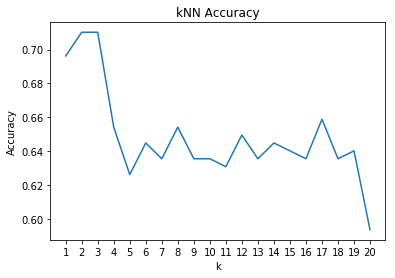

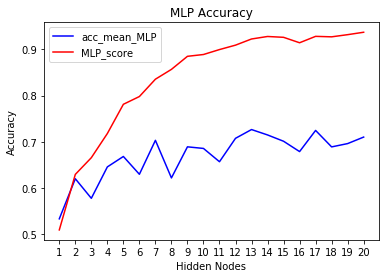

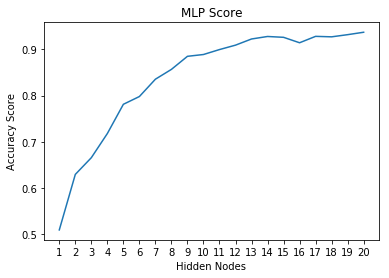

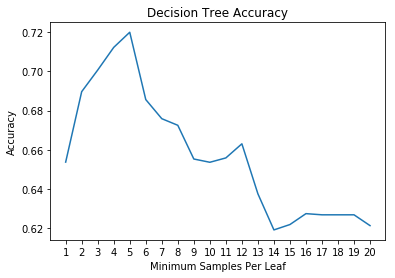

In [32]:

#print(k_error_totals)
k_error_totals.to_csv(os.path.join(working_directory, 'k_error_totals' + '.csv'),index=False)


graph = graphviz.Source(dot_data)
graph.render("fglass_tree_output_types_max_leafs_min_impurity")

plt.figure()
plt.title('kNN Accuracy')
plt.plot('k','acc_kens_kNN', data=k_error_totals)
plt.xticks(k_error_totals['k'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.savefig(os.path.join(working_directory, 'kNN Accuracy' + '.png'), dpi=600)


plt.figure()
plt.title('MLP Accuracy')
plt.plot('k','acc_mean_MLP', data=k_error_totals, c='b')
plt.plot('k','MLP_score', data=k_error_totals, c='r')
plt.xticks(k_error_totals['k'])
plt.xlabel('Hidden Nodes')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(os.path.join(working_directory, 'MLP Accuracy' + '.png'), dpi=600)


plt.figure()
plt.title('MLP Score')
plt.plot('k','MLP_score', data=k_error_totals)
plt.xticks(k_error_totals['k'])
plt.xlabel('Hidden Nodes')
plt.ylabel('Accuracy Score')
plt.savefig(os.path.join(working_directory, 'MLP score' + '.png'), dpi=600)


plt.figure()
plt.title('Decision Tree Accuracy')
#plt.plot((k_error_totals['k']*0.002),'acc_mean_tree', data=k_error_totals)
#plt.xticks(np.arange(0, .04, step=0.005))
plt.plot((k_error_totals['k']),'acc_mean_tree', data=k_error_totals)
plt.xticks(k_error_totals['k'])
plt.xlabel('Minimum Samples Per Leaf',)
plt.ylabel('Accuracy')
plt.savefig(os.path.join(working_directory, 'tree Accuracy depth' + '.png'), dpi=600)


plt.show()

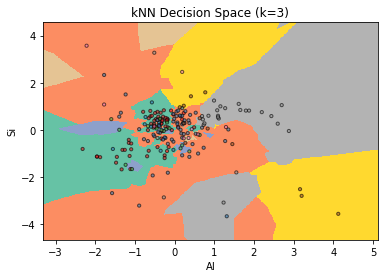

In [42]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


# Modified from a sklearn tutorial


h = .02  # step size in the mesh

# Create color maps
cmap_light = plt.cm.get_cmap('Set2', 20)
cmap_bold = plt.cm.get_cmap('Set1', 20)

for weights in ['uniform']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf_new = neighbors.KNeighborsClassifier(3, weights = weights)
    clf_new.fit(X[:,3:5], y) # 

    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 3].min() - 1, X[:, 3].max() + 1
    y_min, y_max = X[:, 4].min() - 1, X[:, 4].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf_new.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 3], X[:, 4], c=y, cmap=cmap_bold,
                edgecolor='k', s=10, alpha=0.6)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("kNN Decision Space (k=3)")
    #plt.legend()
    plt.xlabel('Al')
    plt.ylabel('Si')

    
plt.savefig(os.path.join(working_directory, 'Decision Space kNN' +'weights'+ '.png'), dpi=600)

plt.show()

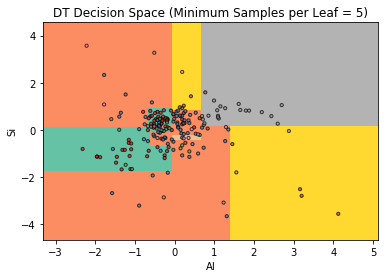

In [46]:
from matplotlib.colors import ListedColormap

%reset_selective x_min, x_max, y_min, y_max, Z, xx, yy 

h = .01  # step size in the mesh

# Create color maps
cmap_light = plt.cm.get_cmap('Set2', 20)
cmap_bold = plt.cm.get_cmap('Set1', 20)


# we create an instance of Neighbours Classifier and fit the data.

clf_new2 =  tree.DecisionTreeClassifier(min_samples_leaf=5)
clf_new2.fit(X[:,3:5], y)

# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 3].min() - 1, X[:, 3].max() + 1
y_min, y_max = X[:, 4].min() - 1, X[:, 4].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf_new2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 3], X[:, 4], c=y, cmap=cmap_bold,
                edgecolor='k', s=10, alpha=0.7)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("DT Decision Space (Minimum Samples per Leaf = 5)")
#plt.legend(cmap_bold)
plt.xlabel('Al')
plt.ylabel('Si')

plt.savefig(os.path.join(working_directory, 'Decision Space DT leaf = 5'+ '.png'), dpi=600)

plt.show()

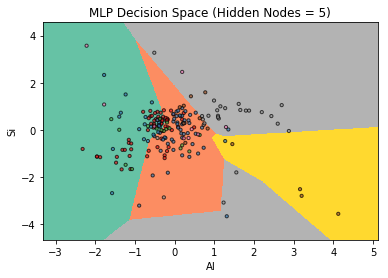

In [47]:
%reset_selective x_min, x_max, y_min, y_max, Z, xx, yy, clf_new3 

h = .01  # step size in the mesh

clf_new3 =  MLPClassifier(hidden_layer_sizes=(5), max_iter=3000, random_state=1)
clf_new3.fit(X[:,3:5], y)


x_min, x_max = X[:, 3].min() - 1, X[:, 3].max() + 1
y_min, y_max = X[:, 4].min() - 1, X[:, 4].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf_new3.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 3], X[:, 4], c=y, cmap=cmap_bold,
                edgecolor='k', s=10, alpha=0.7)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLP Decision Space (Hidden Nodes = 5)")

#plt.legend()
plt.xlabel('Al')
plt.ylabel('Si')

plt.savefig(os.path.join(working_directory, 'Decision Space MLP Hidden Nodes = 5'+ '.png'), dpi=600)

plt.show()

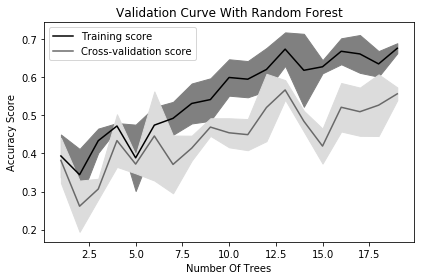

In [44]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve


param_range = np.arange(1, 20, 1)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(MLPClassifier(), 
                                             X, 
                                             y, 
                                             param_name="hidden_layer_sizes", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=10)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()